#  Customer Churn Prediction

This project aims to build a machine learning model that can predict whether a customer will churn (i.e., leave the company). Churn prediction helps businesses retain customers by identifying those at risk and taking proactive action.


## Business Goal

The goal is to reduce customer churn by identifying customers who are likely to leave. Retaining an existing customer is significantly cheaper than acquiring a new one. 

By accurately predicting churn, the company can:
- Offer targeted promotions or services
- Improve customer satisfaction
- Increase customer retention rates
- Boost overall profitability


## Problem Statement

We are provided with customer data from a telecom company. The task is to:
- Analyze the data
- Engineer meaningful features
- Train a machine learning model
- Predict which customers are likely to churn

Our **target variable** is: `Churn` (Yes/No)


## Dataset Overview

The dataset contains the following types of features:
- **Customer demographics**: gender, senior citizen status, etc.
- **Account information**: contract type, payment method, monthly charges
- **Services subscribed**: phone, internet, tech support, etc.
- **Target variable**: whether the customer has churned

We'll begin by exploring and preprocessing these features to prepare them for modeling.


## Importing Required Libraries

We start by importing all necessary libraries for data analysis, visualization, preprocessing, and machine learning.


In [112]:
# Data handling and manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and model training

# For splitting data into training and test sets
from sklearn.model_selection import train_test_split  

# For feature scaling and encoding categorical data
from sklearn.preprocessing import StandardScaler, LabelEncoder  

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Machine learning model
from sklearn.linear_model import LogisticRegression         


## Loading the Dataset

We load the Telco Customer Churn dataset using `pandas`. This dataset contains customer details, services they use, and whether or not they have churned (i.e., stopped using the service).


In [114]:
# Load the dataset from a CSV file
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first 5 rows of the dataset to get an overview
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Summary Statistics

We use `df.describe()` to generate descriptive statistics for the numerical columns in the dataset. This helps us understand the central tendencies, spread, and presence of outliers.


In [116]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [117]:
# Check for any missing values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [118]:
# Check for any duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

## Dataset Information

The `.info()` function gives a concise summary of the DataFrame. It includes:

- The number of entries (rows)
- Column names and their data types
- The number of non-null values in each column

This helps identify which columns may need type conversion or have missing values.


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
# Display all column names in the dataset
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Check for Imbalance

In [123]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Visualizing Churn Distribution by Features

To gain insights into customer behavior, we visualize how churn is distributed across various features such as:

- Gender
- Contract type
- Internet service
- Senior citizen status
- Partnership status
- Dependents
- Tech support usage

These visualizations help us identify patterns or groups more likely to churn, which is valuable for targeted business strategies.


NameError: name 'savefig' is not defined

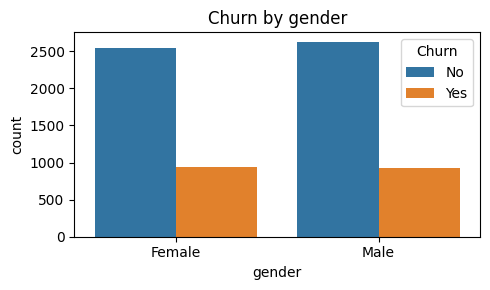

In [125]:
# Define a function to visualize the churn count for a given categorical feature
def plot_churn_by(feature):
    plt.figure(figsize=(5, 3))  # Set figure size
    sns.countplot(data=df, x=feature, hue='Churn')  # Create a count plot with 'Churn' as hue
    plt.title(f'Churn by {feature}')  # Add title to the plot
    plt.tight_layout()
    # Save the plot inside the function
    filename = f"churn_by_{feature.lower()}.png"
    savefig(filename, dpi=300, bbox_inches='tight')  # Save the figure as PNGplt.
    plt.show()
    plt.show()


# Call the function for selected features to explore their relationship with churn
plot_churn_by('gender')
plot_churn_by('Contract')
plot_churn_by('InternetService')
plot_churn_by('SeniorCitizen')
plot_churn_by('Partner')
plot_churn_by('Dependents')
plot_churn_by('TechSupport')





## Overall Churn Distribution

Before diving into feature-specific analysis, it's helpful to look at the general distribution of the target variable — **Churn**.

This chart shows how many customers have churned versus those who have not. It provides a sense of data balance, which is important when building machine learning models.


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Churn vs Not Churned")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.savefig("churnedrate.png", dpi=300, bbox_inches='tight')  # Save the figure as PNGplt.
plt.show()


 ## Churn Analysis by Internet Service Type
 This helps with feature importance and targeted retention strategies

In [ ]:
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.ylabel("Customer Count")
plt.savefig("churnvsinternet.png", dpi=300, bbox_inches='tight')
plt.show()


## Monthly Charges and Churn
helps asses the impact of pricing on churning

In [ ]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges and Churn")
plt.savefig("churnvsmonthlycharge.png", dpi=300, bbox_inches='tight')
plt.show()



## correration betweeen features

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.savefig("correration.png", dpi=300, bbox_inches='tight')
plt.show()


## Tenure Distribution by Churn
 short-tenure customers are churning, focus on onboarding and early experience improvements.

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title("Tenure Distribution by Churn")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.savefig("teurevstenure.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
binary_cols = [
    'gender',         # Male / Female
    'Partner',        # Yes / No
    'Dependents',     # Yes / No
    'PhoneService',   # Yes / No
    'PaperlessBilling', # Yes / No
    'Churn'           # Yes / No (your target variable!)
]

In [ ]:
multi_cols = [
    'StreamingMovies',
    'StreamingTV',
    'TechSupport',
    'DeviceProtection',
    'OnlineSecurity'
]


## Encoding Categorical Features
In machine learning, categorical features need to be transformed into numerical formats that algorithms can understand. For this, we use two techniques:

Label Encoding: This technique is used for binary categorical columns (with only two possible values, like "Yes/No"). It converts categories into numbers. For instance, "Yes" becomes 1 and "No" becomes 0.

One-Hot Encoding: This is used for columns that contain more than two categories. It creates new binary columns for each possible category, marking a 1 for the presence of that category and a 0 for the absence.

In [ ]:
# Label encode binary columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    
# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=multi_cols, drop_first=True)


In [ ]:
df.columns

## Correlation Heatmap
Understanding the relationships between features is crucial in machine learning, as it helps identify which variables are highly correlated and might provide redundant information. A correlation heatmap allows us to visualize these relationships.

In this step, we calculate the correlation matrix for the numeric columns of the dataset and visualize it using a heatmap. The correlation matrix gives us values ranging from -1 to 1:

A correlation of 1 means a perfect positive relationship.

A correlation of -1 indicates a perfect negative relationship.

A correlation of 0 means no linear relationship

In [ ]:
# Filter only numeric columns and calculate the correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.savefig("corr.png", dpi=300, bbox_inches='tight')
plt.show()



## Train-Test Split
Before training a machine learning model, it's essential to split the data into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance on unseen data. A typical split ratio is 80% for training and 20% for testing.

In this case, we'll be using 'Churn' as the target variable and the rest of the columns as features.

In [ ]:
# Assume 'Churn' is the target variable, and the rest are features
X = df.drop(columns=['Churn','customerID'])
y = df['Churn']

# Train-test split (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the Random Forest Classifier
Now that the data is split into training and testing sets, we can proceed to train a machine learning model. We'll use the Random Forest Classifier, a powerful ensemble learning algorithm, to predict customer churn.

The Random Forest algorithm builds multiple decision trees during training and merges them together to improve the accuracy and prevent overfitting.

In [ ]:
# Scale the features (Logistic Regression can perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg_model.fit(X_train_scaled, y_train)


In [ ]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
